# Data Wrangling project

## Assessing

In [1]:
import requests 
import pandas as pd
import os
import tweepy
import json
import numpy as np
import re
import math
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.stattools as stats_model
from datetime import date
import calendar
%matplotlib inline 

### Acquiring image predictions

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#folder_name='Data-wrangling-project'
response=requests.get(url)
with open(url.split('/')[-1].strip('/'), mode='wb+') as file:
    file.write(response.content)


In [89]:
predictions_uncleaned=pd.read_csv('image-predictions.tsv',sep='\t')
predictions_uncleaned.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Acquiring  tweets from weratedogs account

In [103]:
arch_tweets_uncleaned=pd.read_csv('twitter-archive-enhanced.csv')
print(arch_tweets_uncleaned.shape)
arch_tweets_uncleaned.head(3)

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


### Acquiring  tweets from weratedogs account from twitter 

#### below is the code i used to get tweet_json dataframe removing the tokens and access keys

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweets=[]                  

for id in arch_tweets.tweet_id :
                try:
                    tweet = api.get_status(id,tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
                    tweets.append(tweet._json)
                except Exception as e:
                    print('error in '+ str(id))
                    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
                    message = template.format(type(e).__name__, e.args)
                    print(message)
                    
with open('tweet_json.txt', 'w') as outfile:                            
            outfile.write(json.dumps(tweets, indent=4))

pre_df=[]
with open('tweet_json.txt') as json_file:
            data=json.load(json_file)
            for each_dict in data :
                tweet_id = each_dict['id']
                text = each_dict['full_text']
                favorite_count = each_dict['favorite_count']
                retweet_count = each_dict['retweet_count']
                created_at = each_dict['created_at']
                in_reply_to_user_id_str=each_dict['in_reply_to_user_id_str']
           
                if each_dict['place']:
                    country=each_dict['place']['country']
                    place_type=each_dict['place']['place_type']
                    name_city_country=each_dict['place']['full_name']
                else :
                    country = 'NaN'
                    place_type= 'NaN'
                    name_city_country= 'NaN'
                pre_df.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'in_reply_to_user_id_str': str(in_reply_to_user_id_str),
                              'country': str(country),
                               'place_type' :str(place_type),
                               'name_city_country':str(name_city_country)
                            })
                
                tweet_json=pd.DataFrame(pre_df,columns=['tweet_id','text','favorite_count','retweet_count','created_at',
                                                        'in_reply_to_user_id_str','country','place_type','name_city_country'])      
        
        
        
        
        
        


### Assessing the twitter archive table

In [228]:

twitter_archive_uncleaned.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [105]:
twitter_archive_uncleaned.text.sample(10)

675     This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq                                                                     
1614    Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF     
35      I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk                                                                          
1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                     
305     This is Lucy. She spent all morning overseeing the shoveling of the driveway. H*ckin hard work. 13/10 very good girl Lucy https://t.co/gA2GECjiQD
388     This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I                                              
2019    This is just impressive I have nothing else to say. 11/10 https://t.

In [106]:
twitter_archive_uncleaned[twitter_archive_uncleaned['retweeted_status_user_id'].isnull() ].tweet_id.shape[0]

2175

In [107]:
twitter_archive_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Quality: issues with content :
`twitter-archive-enhanced table` 
* remove the re-tweeted tweets also remove unused columns that refer to the re-tweets ( in_reply_to_status_id ,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp )

* change the None values in (doggo,floofer,pupper,puppo) columns into NaNs *

* column names can be more expressive (source) also values within sorce column can be expressed in single string not url  *
* for the timestamp it should be expressed in datetime format 
* examining scores that are higher than 14 , detect whether they correspond to the denominator or they are not actually scores 

Tidiness :
* each column should contribute to a single observation , that is not the case in the last 4 columns 


### Assessing the retrieved tweets table

In [108]:
tweet_info_uncleaned=pd.read_csv('tweet_json.csv')
tweet_info_uncleaned.head(1)

,tweet_id,text,favorite_count,retweet_count,created_at,in_reply_to_user_id_str,country,place_type,name_city_country
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,38221,8374,Tue Aug 01 16:23:56 +0000 2017,None,NaN,NaN,NaN


In [109]:
tweet_info_uncleaned.sample(5)

,tweet_id,text,favorite_count,retweet_count,created_at,in_reply_to_user_id_str,country,place_type,name_city_country
555,787397959788929025,This is Moose. He's rather h*ckin dangerous (you can tell by the collar). 11/10 would still attempt to snug https://t.co/lHVHGdDzb3,11665,3128,Sat Oct 15 21:01:17 +0000 2016,None,NaN,NaN,NaN
1967,669753178989142016,Meet Chester. He just ate a lot and now he can't move. 10/10 that's going to be me in about 17 hours https://t.co/63jh1tYZa5,831,416,Thu Nov 26 05:42:55 +0000 2015,None,NaN,NaN,NaN
874,742465774154047488,"Was just informed about this hero pupper and others like her. Another 14/10, would be an absolute honor to pet https://t.co/hBTzPmj36Z",7665,4176,Mon Jun 13 21:16:49 +0000 2016,None,NaN,NaN,NaN
271,834167344700198914,This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB,16641,3932,Tue Feb 21 22:26:07 +0000 2017,None,NaN,NaN,NaN
1062,712065007010385924,This is Chester. He's clearly in charge of the other dogs. Weird ass paws. Not fit for fetch. 6/10 would still pet https://t.co/o2GvskrhHt,2378,667,Mon Mar 21 23:55:01 +0000 2016,None,NaN,NaN,NaN


In [110]:
tweet_info_uncleaned.loc[1484,]

tweet_id                   682788441537560576                                                                                                            
text                       Happy New Year from your fav holiday squad! 🎉 12/10 for all\r\n\r\nHere's to a pupper-filled year 🍻🐶🐶🐶 https://t.co/ZSdEj59FGf
favorite_count             2611                                                                                                                          
retweet_count              1201                                                                                                                          
created_at                 Fri Jan 01 05:00:24 +0000 2016                                                                                                
in_reply_to_user_id_str    None                                                                                                                          
country                    NaN                                              

In [111]:
tweet_info_uncleaned[~(tweet_info_uncleaned['country'].isnull())]

,tweet_id,text,favorite_count,retweet_count,created_at,in_reply_to_user_id_str,country,place_type,name_city_country
696,763183847194451968,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,5756,1605,Wed Aug 10 01:23:03 +0000 2016,None,United States,city,"Clifton, NJ"


In [112]:
tweet_info_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 9 columns):
tweet_id                   2174 non-null int64
text                       2174 non-null object
favorite_count             2174 non-null int64
retweet_count              2174 non-null int64
created_at                 2174 non-null object
in_reply_to_user_id_str    2174 non-null object
country                    1 non-null object
place_type                 1 non-null object
name_city_country          1 non-null object
dtypes: int64(3), object(6)
memory usage: 152.9+ KB


In [113]:
tweet_info_uncleaned[~(tweet_info_uncleaned['in_reply_to_user_id_str']=='None')].tweet_id.count()

77

Quality : `tweet_info` table :

* usages country,place_type,name_city_country is not efficient as there is too much missing data in the columns
* remove re-tweeted tweets (total of 77 tweets) 
* as we will merge the tweet_info table with archived tweets on only columns(tweet_id,favorite_county,retweet_count) there is no need for furthur adjusment

tidiness : `tweet_info` table :

* merge df -->(archieved tweets table) and the table acquired from twitter (tweet_info) ,columns(favorite_county,retweet_count)of tweet_info to df table *


### Assessing the predictions table

In [90]:

predictions_uncleaned.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


* tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
* p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
* p1_conf is how confident the algorithm is in its #1 prediction → 95%
* p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
* p2 is the algorithm's second most likely prediction → Labrador retriever
* p2_conf is how confident the algorithm is in its #2 prediction → 1%
* p2_dog is whether or not the #2 prediction is a breed of dog → TRUE etc.

In [91]:
predictions_uncleaned.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True
1043,712668654853337088,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,Labrador_retriever,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True
39,666649482315059201,https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg,1,Border_collie,0.447803,True,English_springer,0.170497,True,collie,0.139206,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True


In [92]:
predictions_uncleaned.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [93]:
predictions_uncleaned[predictions_uncleaned['p1_dog']==True].p1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                       89 
Chihuahua                      83 
pug                            57 
chow                           44 
Samoyed                        43 
toy_poodle                     39 
Pomeranian                     38 
malamute                       30 
cocker_spaniel                 30 
French_bulldog                 26 
Chesapeake_Bay_retriever       23 
miniature_pinscher             23 
Siberian_husky                 20 
Staffordshire_bullterrier      20 
German_shepherd                20 
Cardigan                       19 
Shetland_sheepdog              18 
Maltese_dog                    18 
beagle                         18 
Eskimo_dog                     18 
Lakeland_terrier               17 
Rottweiler                     17 
Shih-Tzu                       17 
kuvasz                         16 
Italian_greyhound              16 
Great_Pyrenees                 14 
West_Highland_white_

In [94]:
predictions_uncleaned[predictions_uncleaned['p2_dog']==True].p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
collie                            27 
Eskimo_dog                        27 
Pembroke                          27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
malinois                          20 
miniature_pinscher                20 
Samoyed                           20 
toy_terrier                       20 
chow                              20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [95]:
predictions_uncleaned[(predictions_uncleaned['p1_dog']==False) & (predictions_uncleaned['p2_dog']==False) & ((predictions_uncleaned['p3_dog']==False))].tweet_id.count()

324

In [96]:
predictions_uncleaned.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Quality : issues with content : `predictions_uncleaned` table :

* column names are not clear and don't give an intuition of their content(p1,p1_conf,p1_dog) *
* change the p1_conf,p2_conf into percentages *
* it is better to change p1,p2,p3 to a category type *

### Grouping all assessments by Quality and Tidiness issues :
**Quality : issues with content :**

`predictions_uncleaned` table :
* column names are not clear and don't give an intuition of their content(p1,p1_conf,p1_dog) *
* change the p1_conf,p2_conf into percentages *
* change p1,p2,p3 to a category type *

`twitter-archive-enhanced table` 

* remove the re-tweeted tweets or tweets that are replies on other tweets , tweets that don't contain images also remove unused columns that refer to the re-tweets ( in_reply_to_status_id ,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp )

* change the None values in (doggo,floofer,pupper,puppo) columns into NaNs *

* column names can be more expressive (source) also values within sorce column can be expressed in single string not url  *
* for the timestamp it should be expressed in datetime format 
* examining scores that are higher than 14 , detect whether they correspond to the denominator or they are not actually scores

`tweet_info table` :

* usages country,place_type,name_city_country is not efficient as there is too much missing data in the columns
* remove re-tweeted tweets (total of 77 tweets) 


**tidiness :**

`tweet_info` table :

* merge df -->(archieved tweets table) and the table acquired from twitter (tweet_info) ,columns(favorite_county,retweet_count)of tweet_info to df table *

`twitter-archive-enhanced table` 

* in the last 4 columns , we can have more than one image per tweet so more than one label can be given to a tweet with maximum 2 images in our given dataset, for each tweet 2 columns only can represent dog type one for the first image and the other for the second

## Cleaning process :

###  Quality issues  :

#### `predictions_uncleaned table`

Define:
* column names are not clear and don't give an intuition of their content(p1,p1_conf,p1_dog)

code:

In [97]:
predictions=predictions_uncleaned.copy()
predictions=predictions.rename(columns={'p1':'First_prediction','p1_conf':'confidence_percent_1','p1_dog':'Is_it_dog_1',
                            'p2':'Second_prediction','p2_conf':'confidence_percent_2','p2_dog':'Is_it_dog_2',
                            'p3':'Third_prediction','p3_conf':'confidence_percent_3','p3_dog':'Is_it_dog_3'})

test:

In [98]:
predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'First_prediction',
       'confidence_percent_1', 'Is_it_dog_1', 'Second_prediction',
       'confidence_percent_2', 'Is_it_dog_2', 'Third_prediction',
       'confidence_percent_3', 'Is_it_dog_3'],
      dtype='object')

Define: 
* change the p1_conf,p2_conf,p2_conf into percentage using vectorization

code :

In [99]:

predictions['confidence_percent_1']=(100. * predictions['confidence_percent_1']).round(1)
predictions['confidence_percent_2']=(100. * predictions['confidence_percent_2']).round(1)
predictions['confidence_percent_3']=(100. * predictions['confidence_percent_3']).round(1)

test:

In [100]:
predictions['confidence_percent_1'].head(1)
predictions['confidence_percent_2'].head(1)
predictions['confidence_percent_3'].head(1)

0    6.1
Name: confidence_percent_3, dtype: float64

 Define: 
* change p1,p2,p3 to a category type

code:

In [101]:
predictions['First_prediction']=predictions['First_prediction'].astype('category')
predictions['Second_prediction']=predictions['Second_prediction'].astype('category')
predictions['Third_prediction']=predictions['Third_prediction'].astype('category')

test:

In [102]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                2075 non-null int64
jpg_url                 2075 non-null object
img_num                 2075 non-null int64
First_prediction        2075 non-null category
confidence_percent_1    2075 non-null float64
Is_it_dog_1             2075 non-null bool
Second_prediction       2075 non-null category
confidence_percent_2    2075 non-null float64
Is_it_dog_2             2075 non-null bool
Third_prediction        2075 non-null category
confidence_percent_3    2075 non-null float64
Is_it_dog_3             2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


### continue cleaning Quality issues :
#### `twitter-archive-enhanced table` 

In [114]:
twitter_archive=twitter_archive_uncleaned.copy()

Define:
* remove the re-tweeted tweets or tweets that are replies on other tweets , tweets that don't contain images also remove unused columns that refer to the re-tweets ( in_reply_to_status_id ,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp )


code :

In [115]:
twitter_archive=twitter_archive[(twitter_archive['retweeted_status_user_id'].isnull())&(twitter_archive['in_reply_to_status_id'].isnull()) ]

In [116]:
twitter_archive=twitter_archive[~(twitter_archive['expanded_urls'].isnull())]

In [117]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [118]:
twitter_archive=twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

test:

In [119]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


Define:
* change the 'None' values in (doggo,floofer,pupper,puppo) columns into NaNs 

code:

In [120]:
def change_2_null(x):
    if x =='None':
        x= np.nan
    return x

columns=['doggo','floofer','pupper','puppo']
for col in columns:
    twitter_archive[col]=twitter_archive[col].apply(change_2_null)

test:

In [121]:
twitter_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN


In [122]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


Define :
* column names can be more expressive (source) also values within sorce column can be expressed in single string not url  

code :

In [123]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [124]:
twitter_archive.source=twitter_archive.source.apply(lambda x : x.split('>')[1].split('<')[0])

In [125]:
twitter_archive=twitter_archive.rename(columns={'source':'source_of_tweet'})

test:

In [126]:
twitter_archive.source_of_tweet.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source_of_tweet, dtype: int64

Define:
* for the timestamp it should be expressed in datetime format 

code:

In [127]:
twitter_archive.timestamp=pd.to_datetime(twitter_archive.timestamp)

test:

In [128]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source_of_tweet       2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


Define :
* create new columns referring whether an entry contain emojis and urls in tweet text or not

code:

In [129]:
twitter_archive.loc[1224 ,].text

'Happy Easter from the squad! 🐇🐶 13/10 for all https://t.co/YMx4KWJUAB'

In [130]:
#sub()-->Find all substrings where the RE matches, and replace them with a different string

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


In [131]:
count1=0
count2=0
for i,tweet in enumerate(twitter_archive.text):
    if emoji_pattern.findall(tweet):
        twitter_archive.loc[i,'is_emoji']=True
        count1+=1
        print(tweet)
    else :
        twitter_archive.loc[i,'is_emoji']=False
        count2+=1
        
count1,count2,twitter_archive.shape[0]
print(twitter_archive.is_emoji.describe())

This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA
And finally, happy 4th of July from the squad 🇺🇸 13/10 for all https://t.co/Mr8Lr3iOUe
I swear to god if we get sent another Blue Madagascan Peacock we'll deactivate. We 👏 Only 👏 Rate 👏 Dogs... 9/10 https://t.co/bbta2Q4URK
Happy Easter from the squad! 🐇🐶 13/10 for all https://t.co/YMx4KWJUAB
Reminder that we made our first set of stickers available! All are 12/10 would stick
Use code "pupper" at checkout🐶

https://t.co/kJIMNyMNKV
We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
The squad is back for St. Patrick's Day! ☘ 💚
13/10 for all https://t.co/OcCDb2bng5
WeRateDogs stickers are here and they're 12/10! Use code "puppers" at checkout 🐶🐾

Shop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r
Happy New Year from your fav holiday squad! 🎉 12/10 for all

Her

test:

In [132]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2038
Data columns (total 13 columns):
tweet_id              2094 non-null float64
timestamp             2094 non-null datetime64[ns]
source_of_tweet       2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null float64
name                  2094 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
is_emoji              2094 non-null object
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 337.0+ KB


Define :
* examining scores that are higher than 14 , detect whether they correspond to the denominator or they are not actually scores , only one entry has this issue , replace the score values with NaN

code:

In [133]:
twitter_archive.rating_denominator.value_counts()

10.0     2077
50.0     3   
80.0     2   
11.0     2   
150.0    1   
110.0    1   
90.0     1   
70.0     1   
170.0    1   
2.0      1   
120.0    1   
40.0     1   
20.0     1   
7.0      1   
Name: rating_denominator, dtype: int64

In [134]:
pd.set_option('display.max_colwidth', -1)
twitter_archive[twitter_archive['rating_numerator']>14]

,tweet_id,timestamp,source_of_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_emoji
433,8.206902e+17,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,NaN,NaN,NaN,NaN,False
516,8.109847e+17,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,NaN,NaN,NaN,NaN,False
695,7.867091e+17,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,NaN,NaN,NaN,NaN,False
763,7.780270e+17,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,NaN,NaN,pupper,NaN,False
902,7.584672e+17,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,NaN,NaN,NaN,NaN,False
979,7.499813e+17,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,NaN,NaN,NaN,False
1120,7.311560e+17,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,this,NaN,NaN,NaN,NaN,False
1202,7.164391e+17,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,NaN,NaN,NaN,NaN,False
1228,7.139006e+17,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,None,NaN,NaN,NaN,NaN,False
1254,7.106587e+17,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,None,NaN,NaN,NaN,NaN,False


In [135]:

twitter_archive=twitter_archive.drop(516)

test:

In [136]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2038
Data columns (total 13 columns):
tweet_id              2093 non-null float64
timestamp             2093 non-null datetime64[ns]
source_of_tweet       2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null float64
rating_denominator    2093 non-null float64
name                  2093 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
is_emoji              2093 non-null object
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 256.9+ KB


In [137]:
twitter_archive.shape[0]

2349

### continue cleaning Quality issues :
#### `tweet_info table` :


In [138]:
tweet_info=tweet_info_uncleaned.copy()

Define:
* usages country,place_type,name_city_country is not efficient as there is too much missing data in the columns ,remove re-tweeted tweets (total of 77 tweets) 

code:

In [139]:
tweet_info.in_reply_to_user_id_str.value_counts()

None                  2097
4196983835            47  
21955058              2   
4717297476            1   
194351775             1   
30582082              1   
29166305              1   
730505014150582272    1   
3105440746            1   
21435658              1   
291859009             1   
20683724              1   
11856342              1   
840547864354918400    1   
16374678              1   
2894131180            1   
2319108198            1   
28785486              1   
77596200              1   
15846407              1   
1582853809            1   
47384430              1   
467036706             1   
1198988510            1   
2281181600            1   
16487760              1   
26259576              1   
180670967             1   
13615722              1   
358972768             1   
113211856             1   
Name: in_reply_to_user_id_str, dtype: int64

In [140]:
tweet_info.in_reply_to_user_id_str=tweet_info.in_reply_to_user_id_str.apply(change_2_null)

In [141]:
tweet_info=tweet_info[tweet_info['in_reply_to_user_id_str'].isnull()]

In [142]:
tweet_info=tweet_info.drop(['country','place_type','name_city_country','in_reply_to_user_id_str'],axis=1)

test:

In [143]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2173
Data columns (total 5 columns):
tweet_id          2097 non-null int64
text              2097 non-null object
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
created_at        2097 non-null object
dtypes: int64(3), object(2)
memory usage: 98.3+ KB


### **tidiness issues:**

#### `twitter-archive-enhanced table` 


Define :
* in the last 4 columns , we can have more than one image per tweet so more than one label can be given to a tweet with maximum 2 images in our given dataset, for each tweet 2 columns only can represent dog type one for the first image and the other for the second

* my solutions include : scan over each column , for each if entry value is not equal None add the label to a new column called dog_1_label if the value is equal None , add NaN to it's corresponding dog_1_label cell , for a specific entry if the dog_1_label entry is already inhabited with a value , it means the naming correspond to another image of the same tweet (we can check later bu comparing the number of extended urls) we add the other name to dog_1_label column



code:

In [144]:
labels=['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive['dog_1_label']=" "
twitter_archive['dog_2_label']=" "
for label in labels :
    for index, row in twitter_archive.iterrows():
        if not(twitter_archive.loc[index,label] is np.nan) :
               
                if not(twitter_archive.loc[index,'dog_1_label'] ==" ") :
                      twitter_archive.loc[index,'dog_2_label']=label
                else :
                      twitter_archive.loc[index,'dog_1_label']=label
                      
twitter_archive.dog_1_label=twitter_archive.dog_1_label.replace({" ": np.nan})
twitter_archive.dog_2_label=twitter_archive.dog_2_label.replace({" ": np.nan})
twitter_archive=twitter_archive.drop(['doggo', 'floofer','pupper', 'puppo'],axis=1)

test:

In [145]:
twitter_archive.dog_1_label.value_counts()

pupper     220
doggo      83 
puppo      23 
floofer    9  
Name: dog_1_label, dtype: int64

### continue tidiness issues :
#### `tweet_info` table :

Define:
* merge twitter_archive -->(archieved tweets table) and the table acquired from twitter (tweet_info) ,columns(favorite_county,retweet_count)of tweet_info , also merge predictions on them *

code:

In [146]:
list=['tweet_id','favorite_count','retweet_count']
tweet_info[list]

merged_table=pd.merge(twitter_archive,tweet_info[list],how='inner',on='tweet_id')
merged_table=pd.merge(merged_table,predictions,how='left',on='tweet_id')

In [147]:
merged_table.source_of_tweet=merged_table.source_of_tweet.astype('category')

test:

In [148]:
tweets_2_images=merged_table[~(merged_table['dog_2_label'].isnull())].tweet_id
merged_table[merged_table['tweet_id'].isin(tweets_2_images.values)]
predictions[predictions['tweet_id'].isin(tweets_2_images.values)]

merged_table.to_csv('twitter_archive_master.csv', index=False, date_format='%Y-%m-%d %H:%M:%S')

In [149]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1366
Data columns (total 24 columns):
tweet_id                1367 non-null float64
timestamp               1367 non-null datetime64[ns]
source_of_tweet         1367 non-null category
text                    1367 non-null object
expanded_urls           1367 non-null object
rating_numerator        1367 non-null float64
rating_denominator      1367 non-null float64
name                    1367 non-null object
is_emoji                1185 non-null object
dog_1_label             225 non-null object
dog_2_label             8 non-null object
favorite_count          1367 non-null int64
retweet_count           1367 non-null int64
jpg_url                 1283 non-null object
img_num                 1283 non-null float64
First_prediction        1283 non-null category
confidence_percent_1    1283 non-null float64
Is_it_dog_1             1283 non-null object
Second_prediction       1283 non-null category
confidence_percent_2    1

## Analyzing the Datasets

In [150]:
tweets=pd.read_csv('twitter_archive_master.csv')
tweets.head(1)

,tweet_id,timestamp,source_of_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,is_emoji,dog_1_label,...,img_num,First_prediction,confidence_percent_1,Is_it_dog_1,Second_prediction,confidence_percent_2,Is_it_dog_2,Third_prediction,confidence_percent_3,Is_it_dog_3
0,8.918152e+17,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,False,NaN,...,1.0,Chihuahua,71.6,True,malamute,7.8,True,kelpie,3.1,True


### univariate analysis :

* 1-How the tweets are spread over time, does a certain year or month have a higher tweet rate ?
* 2-how the dog ratings are spread over the dataset , how often each rating occur ?
* 3-For different labels given to dogs on this rating system(doggo,pupper,puppo,floofer) which refer to their age and distinct features , how the dataset is divided among these labels ?
* 4-what is the average retweet and favourite count for weratedogs twitter account ?
* 5-Do people usually use the twitter  through web client or an app as(twitter for iphone . Vine , tweetDeck )


#### 1-How the tweets are spread over time, does a certain year or month have a higher tweet rate ?

In [151]:

tweets['timestamp']=pd.to_datetime(tweets['timestamp'])
tweets['year_of_tweet']=tweets['timestamp'].dt.year.astype('category')
tweets['month_of_tweet']=tweets['timestamp'].dt.month.astype('category')

tweets['dog_1_label']=tweets['dog_1_label'].astype('category')
tweets['dog_2_label']=tweets['dog_2_label'].astype('category')

tweets['dog_1_label']= tweets['dog_1_label'].replace(np.nan,'Unlabeled')
tweets['dog_2_label']= tweets['dog_2_label'].replace(np.nan,'Unlabeled')
tweets.is_emoji.describe()

count     1185 
unique    2    
top       False
freq      1177 
Name: is_emoji, dtype: object

count     1367
unique    3   
top       2016
freq      702 
Name: year_of_tweet, dtype: int64
count     1367
unique    12  
top       12  
freq      279 
Name: month_of_tweet, dtype: int64


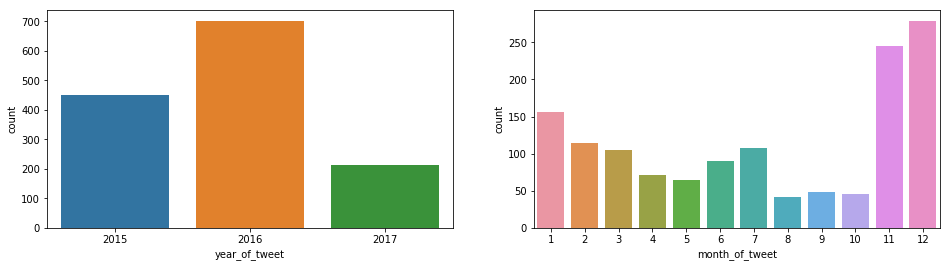

In [152]:
print(tweets['year_of_tweet'].describe())
print(tweets['month_of_tweet'].describe())
f, ax = plt.subplots(1, 2, figsize=(16, 4))
ax = ax.ravel()

sns.countplot(x='year_of_tweet', data=tweets, ax=ax[0])
sns.countplot(x='month_of_tweet', data=tweets,ax=ax[1])


**on average weratedogs twitter account rated more dogs in the year 2016 with approximately 1000 tweet , where months (december and november) mark the highest activity months**

#### 2-how the dog ratings are spread over the dataset , how often each rating occur ?

count    1367.000000
mean     12.678859  
std      49.734272  
min      1.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64


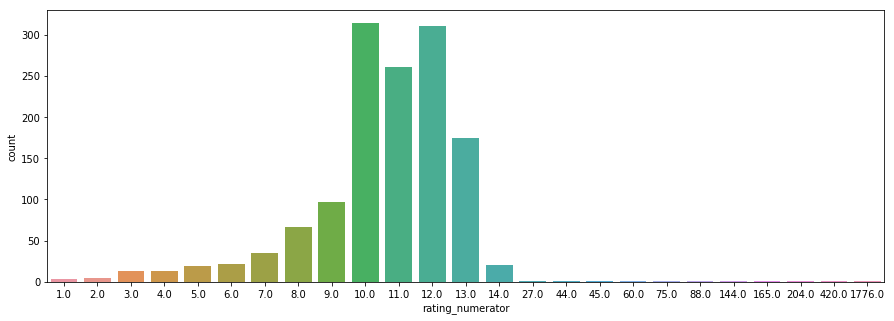

In [153]:
print(tweets.rating_numerator.describe())
plt.figure(figsize=(15, 5))
sns.countplot(x=('rating_numerator'),data=tweets);

**In the dataset 2077 ratings are of denominator 10 , while 18 are of higher ones with only one faulty datapoint we can consider those as outliers , the most frequent score is 12/10 , the mean score is also approximatley 12**

#### 3-For different labels given to dogs on this rating system(doggo,pupper,puppo,floofer) which refer to their age and distinct features , how the dataset is divided among these labels ?

count     1367     
unique    5        
top       Unlabeled
freq      1142     
Name: dog_1_label, dtype: object
count     1367     
unique    4        
top       Unlabeled
freq      1359     
Name: dog_2_label, dtype: object


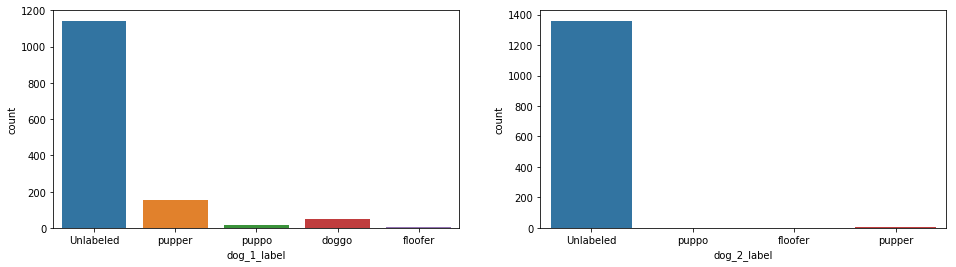

In [154]:
print(tweets.dog_1_label.describe())
print(tweets.dog_2_label.describe())

f, ax = plt.subplots(1, 2, figsize=(16, 4))
ax = ax.ravel()
sns.countplot(x=('dog_1_label'),data=tweets,ax=ax[0])
sns.countplot(x='dog_2_label',data=tweets,ax=ax[1])

**In the dataset , labels are given to 364 images of dogs where the rest are not given labels , these labels refers to 4 categories weratedogs system invented :
doggo : older dog
pupper: younger dog
puppo : the phase between younger and older dog compared to teen period in humans
floofer: a dog with excess fur**

**The image rated can contain 2 dogs so 2 labels are given , the label for the first dog is documented in (dog_1_label) column , while the label for the second dog is documented in (dog_2_label)**

**most of rated images are of younger dogs with 220 pupper out of all labeled dogs , followed by older dogs (doggos)
we can see that the doggos category is not found whenever a second dog is found in an image , that maybe due to the fact that usually there is a doggo and a pupper in one image**


#### 4-what is the average retweet and favourite count for weratedogs twitter account ?

count    1367.000000  
mean     8339.765911  
std      11554.522194 
min      80.000000    
25%      1780.000000  
50%      3857.000000  
75%      10339.000000 
max      127647.000000
Name: favorite_count, dtype: float64
count    1367.000000 
mean     2578.020483 
std      4106.879183 
min      12.000000   
25%      584.000000  
50%      1272.000000 
75%      3028.000000 
max      61329.000000
Name: retweet_count, dtype: float64


E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


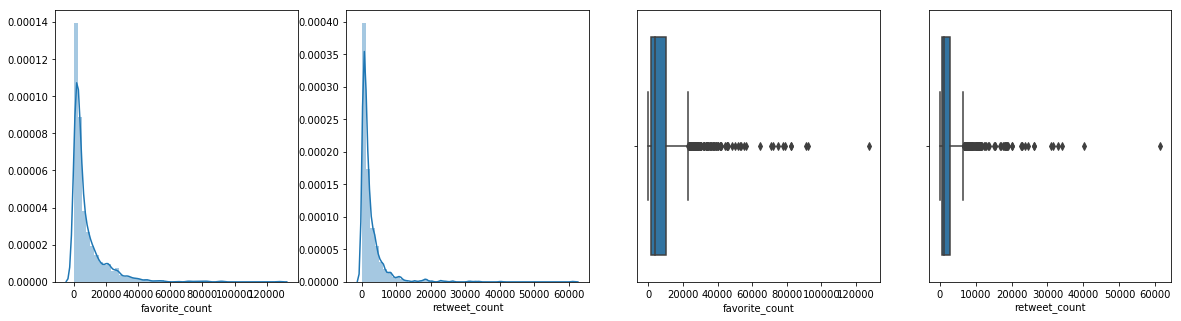

In [155]:
print(tweets.favorite_count.describe())
print(tweets.retweet_count.describe())
f,ax=plt.subplots(1,4,figsize=(20,5))
ax = ax.ravel()
sns.distplot(tweets['favorite_count'],ax=ax[0])
sns.distplot(tweets['retweet_count'],ax=ax[1])
sns.boxplot(tweets['favorite_count'],ax=ax[2])
sns.boxplot(tweets['retweet_count'],ax=ax[3])

In [156]:
tweets[tweets['favorite_count']>11059].tweet_id.count(),tweets[tweets['retweet_count']>4500].tweet_id.count()

(320, 204)

**From the distribution we can see that there are outliers within the counts , i shall remove outliesr temporarlily for the purpose of have a better look at average counts**

Declaring Functions for detecting and removing outliers 

In [157]:
def removing_outlier_z_score (x,threshold=2):
        z=np.abs(stats.zscore(tweets.favorite_count))
        point_keep=np.where(z > threshold)
        x_outlier_free=x.loc[point_keep]
        return x_outlier_free
def removing_outlier_IQR (x,lower_range=0.25):
        
        M=stats_model.medcouple(x)
        Q1=np.quantile(x,lower_range)
        Q3=np.quantile(x,1-lower_range)
        IQR=Q3-Q1
        if M>=0 :
            x_outlier_free =x[~( (x < (Q1 - (math.exp(-4*M))*1.5 * IQR)) |(x > (Q3  + (math.exp(3*M))*1.5 * IQR))  )]
        if M<0 :
            x_outlier_free =x[~( (x < (Q1 - (math.exp(-3*M))*1.5 * IQR)) |(x > (Q3  + (math.exp(4*M))*1.5 * IQR))  )]   
        return x_outlier_free
def mad_based_outlier(points, thresh=0.5):
    if len(points.shape) == 1:
        points = points[:,None]
 
    median = np.median(points, axis=0)

    diff = np.sum((points - median)**2, axis=-1)
    
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation
    point_keep=np.where(modified_z_score> thresh)
    x_without_outlier=points[point_keep,].reshape(-1)
    return x_without_outlier

In [158]:
len(mad_based_outlier(tweets['favorite_count'].apply(np.log10).values)),tweets['favorite_count'].count()

(823, 1367)

In [159]:
len(removing_outlier_IQR(tweets['favorite_count'].values)),tweets['favorite_count'].count()

(1273, 1367)

E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


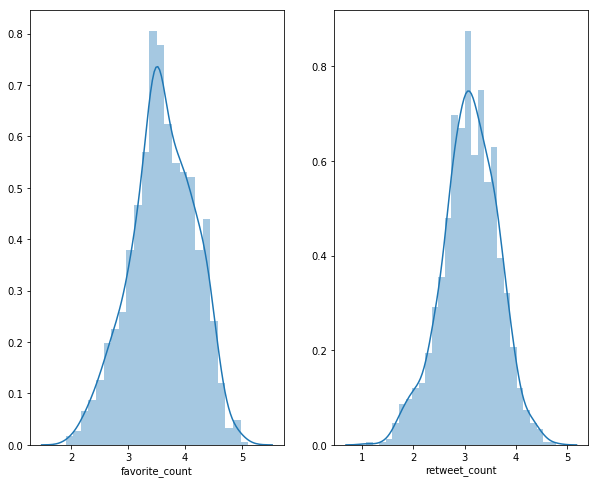

In [160]:

fig, axs = plt.subplots(1,2,figsize=(10,8))

sns.distplot(tweets['favorite_count'].apply(np.log10),ax=axs[0])
sns.distplot(tweets['retweet_count'].apply(np.log10),ax=axs[1])


In [161]:
#using outliers detectors on now normal distributed data
without_outliers_favorite_count=mad_based_outlier(tweets['favorite_count'].apply(np.log10))
without_outliers_tweet_count=mad_based_outlier(tweets['retweet_count'].apply(np.log10))
tweets_no_outliers_mad=tweets[tweets['favorite_count'].apply(np.log10).isin(without_outliers_favorite_count)]
tweets_no_outliers_mad=tweets[tweets['retweet_count'].apply(np.log10).isin(without_outliers_tweet_count)]

count    841.000000   
mean     10773.889417 
std      14084.748660 
min      80.000000    
25%      1063.000000  
50%      5765.000000  
75%      16109.000000 
max      127647.000000
Name: favorite_count, dtype: float64
count    841.000000  
mean     3343.923900 
std      5076.423985 
min      12.000000   
25%      377.000000  
50%      2370.000000 
75%      4371.000000 
max      61329.000000
Name: retweet_count, dtype: float64


E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


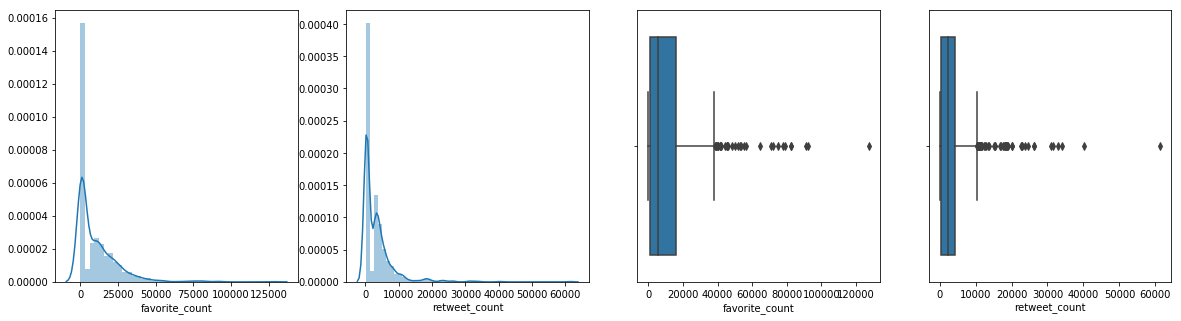

In [162]:
print(tweets_no_outliers_mad.favorite_count.describe())
print(tweets_no_outliers_mad.retweet_count.describe())
f,ax=plt.subplots(1,4,figsize=(20,5))
ax = ax.ravel()
sns.distplot(tweets_no_outliers_mad['favorite_count'],ax=ax[0])
sns.distplot(tweets_no_outliers_mad['retweet_count'],ax=ax[1])
sns.boxplot(tweets_no_outliers_mad['favorite_count'],ax=ax[2])
sns.boxplot(tweets_no_outliers_mad['retweet_count'],ax=ax[3])

In [163]:
tweets[tweets['favorite_count']>90000].tweet_id.count() ,tweets[tweets['retweet_count']>40000].tweet_id.count()
tweets.shape[0],tweets_no_outliers_mad.shape[0]

(1367, 841)

In [188]:
#using outliers detectors on now normal distributed data
without_outliers_quantile_favorite_count=removing_outlier_IQR(tweets['favorite_count'])
without_outliers_quantile_tweet_count=removing_outlier_IQR(tweets['retweet_count'])
with_out_outliers_quantile_numerator_rating=removing_outlier_IQR(tweets['rating_numerator'])
tweets_no_outliers_quantile=tweets[tweets['favorite_count'].isin(without_outliers_quantile_favorite_count)]
tweets_no_outliers_quantile=tweets[tweets['retweet_count'].isin(without_outliers_quantile_tweet_count)]
tweets_no_outliers_quantile=tweets[tweets['rating_numerator'].isin(with_out_outliers_quantile_numerator_rating)]

count    1280.000000  
mean     8646.114063  
std      11774.388758 
min      80.000000    
25%      1913.000000  
50%      4063.500000  
75%      10904.000000 
max      127647.000000
Name: favorite_count, dtype: float64
count    1280.000000 
mean     2657.895312 
std      4209.324912 
min      12.000000   
25%      584.000000  
50%      1319.500000 
75%      3152.750000 
max      61329.000000
Name: retweet_count, dtype: float64


E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


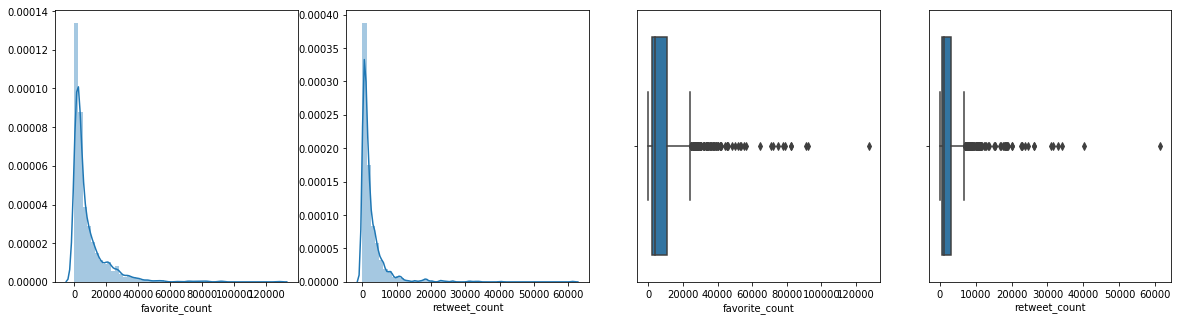

In [189]:
print(tweets_no_outliers_quantile.favorite_count.describe())
print(tweets_no_outliers_quantile.retweet_count.describe())
f,ax=plt.subplots(1,4,figsize=(20,5))
ax = ax.ravel()
sns.distplot(tweets_no_outliers_quantile['favorite_count'],ax=ax[0])
sns.distplot(tweets_no_outliers_quantile['retweet_count'],ax=ax[1])
sns.boxplot(tweets_no_outliers_quantile['favorite_count'],ax=ax[2])
sns.boxplot(tweets_no_outliers_quantile['retweet_count'],ax=ax[3])

In [190]:
tweets.shape[0],tweets_no_outliers_quantile.shape[0]

(1367, 1280)

In [164]:
523/2094 ,323/2094 , 822/2094 ,(2093-2029)/2093

(0.24976122254059216,
 0.15425023877745941,
 0.39255014326647564,
 0.030578117534639272)



 i tried 2 approaches :
 
 1-transforming the data by log transform so that the distribution is somehow normal and then apply outlier detector using 
 adjusted z-score (using median that is more robust to outliers instead of mean) , that mounted to have 1271 points out of 2093 
 that removing 800 data points for the favorite count :
 
after removing higher counts the difference is :
 
75%      16808.000000 
max      164941.000000

the outcome withnot what i intended removing more than presumed data points

 2- using Interquartile Range Method ,the problem was there is an assumption of symmetry ,to solve that issue i used the adjusted box plots approach where the skweness of data is accounted for by med-couple() function , that resulted in removing 3% of the data points , also decreasing the gap 
 
75%      10894.000000
max      78799.000000

the mean favorite count mounted to 8000 counts , and the retweet count mounted to 2400 counts

the higher counts of favorites and retweets are kept to be furthur investigated in multivariate analysis 


#### 5-Do people usually use the twitter  through web client or an app as(twitter for iphone . Vine , tweetDeck )

In [165]:
1961 /2093

0.9369326325848065

count     1367              
unique    4                 
top       Twitter for iPhone
freq      1277              
Name: source_of_tweet, dtype: object


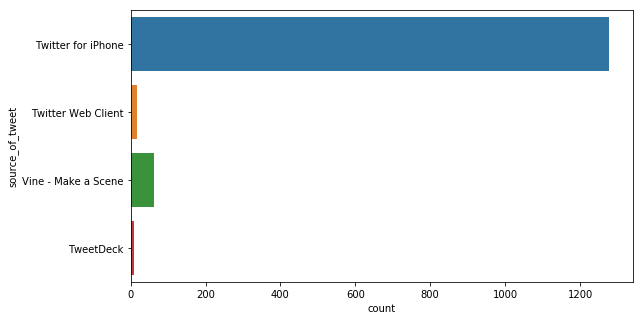

In [227]:
print(tweets.source_of_tweet.describe())
plt.figure(figsize=(9, 5))
sns.countplot(y=('source_of_tweet'),data=tweets)

**From all 2094 filtered tweets of weratedogs account , the majority of tweets are made from iphone mobile device leading with 1961 out of 2093 that is 93% of the tweets , followed by vine a mobile app would that allows users to publish their videos directly to Twitter**

In [167]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 26 columns):
tweet_id                1367 non-null float64
timestamp               1367 non-null datetime64[ns]
source_of_tweet         1367 non-null object
text                    1367 non-null object
expanded_urls           1367 non-null object
rating_numerator        1367 non-null float64
rating_denominator      1367 non-null float64
name                    1367 non-null object
is_emoji                1185 non-null object
dog_1_label             1367 non-null object
dog_2_label             1367 non-null object
favorite_count          1367 non-null int64
retweet_count           1367 non-null int64
jpg_url                 1283 non-null object
img_num                 1283 non-null float64
First_prediction        1283 non-null object
confidence_percent_1    1283 non-null float64
Is_it_dog_1             1283 non-null object
Second_prediction       1283 non-null object
confidence_percent_2    128

#### For the predictions , how confident is the algorithim used in it's results ?

E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


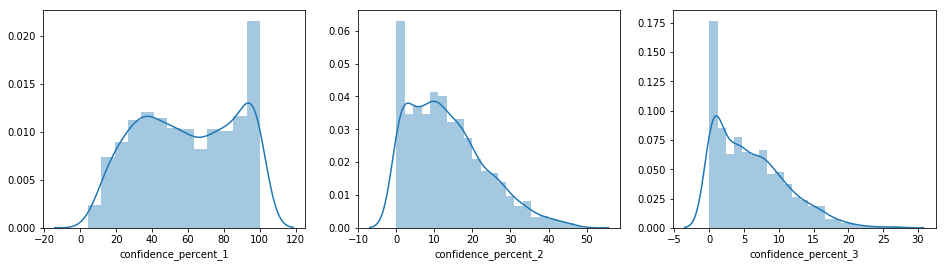

In [178]:
f,ax=plt.subplots(1,3,figsize=(16,4))
ax = ax.ravel()
sns.distplot(predictions['confidence_percent_1'],ax=ax[0])
sns.distplot(predictions['confidence_percent_2'],ax=ax[1])
sns.distplot(predictions['confidence_percent_3'],ax=ax[2])

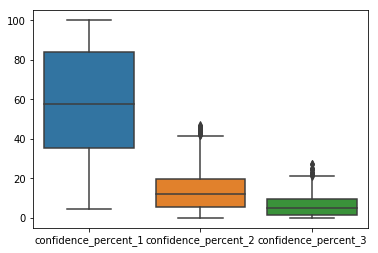

In [179]:
sns.boxplot(data=tweets[['confidence_percent_1','confidence_percent_2','confidence_percent_3']])

In [180]:
predictions[predictions['confidence_percent_1']>90].tweet_id.count()/predictions['confidence_percent_1'].shape[0]

0.18987951807228914

* we can see that the confidence percentage for the first prediction varies from 40 to 80 percent with some percentages reaching 100 percent 

* percentage of tweets exceeding 90% confidence interval is 18% out of all images categorized as first predictions

* the confidence percentage for the second prediction varies from 10 to 20 percent with some percentages reaching 50 percent 

* the confidence percentage for the third prediction varies from 5 to 10 percent with some percentages reaching 15 percent 


#### How much of the images actually have dogs in them ?

In [181]:
df=predictions[['Is_it_dog_1','Is_it_dog_2','Is_it_dog_3']]
pd.melt(df).head()

,variable,value
0,Is_it_dog_1,True
1,Is_it_dog_1,True
2,Is_it_dog_1,True
3,Is_it_dog_1,True
4,Is_it_dog_1,True


count     2075
unique    2   
top       True
freq      1532
Name: Is_it_dog_1, dtype: object


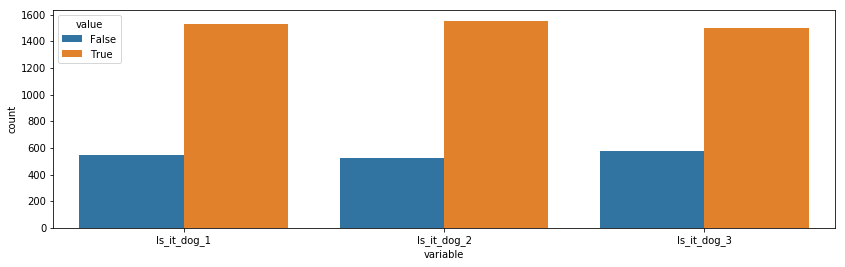

In [182]:
print(predictions.Is_it_dog_1.describe())
f,ax=plt.subplots(1,1,figsize=(14,4))
sns.countplot(x='variable',hue='value',data=pd.melt(df) )

In [183]:
predictions[predictions.Is_it_dog_1].tweet_id.count()/predictions.Is_it_dog_1.shape[0] ,predictions[predictions.Is_it_dog_2].tweet_id.count()/predictions.Is_it_dog_2.shape[0],predictions[predictions.Is_it_dog_3].tweet_id.count()/predictions.Is_it_dog_3.shape[0]

(0.7383132530120482, 0.7484337349397591, 0.7224096385542169)

**Within the total number of images in our tweets approximatly 74% of them are assumed to be dogs by the algorithm**

#### what is the top 10  type of dogs (assuming first prediction is true) that are rated in the weratedog account ?

count     2075            
unique    378             
top       golden_retriever
freq      150             
Name: First_prediction, dtype: object


[Text(0,0,'golden_retriever'),
 Text(0,0,'Labrador_retriever'),
 Text(0,0,'Pembroke'),
 Text(0,0,'Chihuahua'),
 Text(0,0,'pug'),
 Text(0,0,'chow'),
 Text(0,0,'Samoyed'),
 Text(0,0,'toy_poodle'),
 Text(0,0,'Pomeranian'),
 Text(0,0,'malamute')]

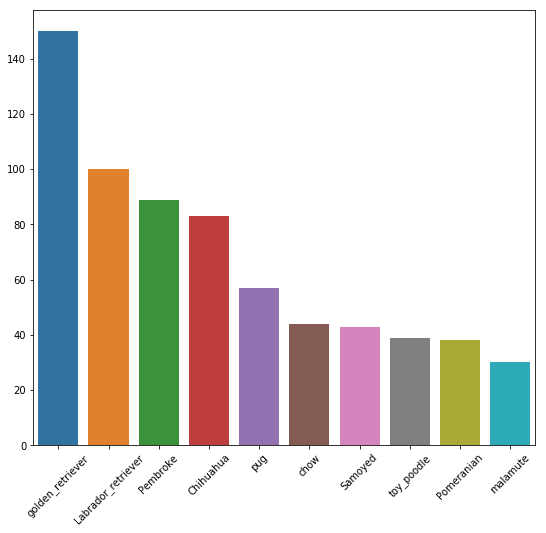

In [185]:
print(predictions.First_prediction.describe())

plt.figure(figsize=(9, 8))

#predictions.groupby('First_prediction',as_index=False).count().sort_values(by='First_prediction')
x=predictions.First_prediction.value_counts(sort=True)[:10].index.astype('str')
y=predictions.First_prediction.value_counts(sort=True)[:10].values

ax=sns.barplot(x=x,y=y)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)

In [186]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 26 columns):
tweet_id                1367 non-null float64
timestamp               1367 non-null datetime64[ns]
source_of_tweet         1367 non-null object
text                    1367 non-null object
expanded_urls           1367 non-null object
rating_numerator        1367 non-null float64
rating_denominator      1367 non-null float64
name                    1367 non-null object
is_emoji                1185 non-null object
dog_1_label             1367 non-null object
dog_2_label             1367 non-null object
favorite_count          1367 non-null int64
retweet_count           1367 non-null int64
jpg_url                 1283 non-null object
img_num                 1283 non-null float64
First_prediction        1283 non-null object
confidence_percent_1    1283 non-null float64
Is_it_dog_1             1283 non-null object
Second_prediction       1283 non-null object
confidence_percent_2    128

#### what is the average length of tweet ?

In [191]:
tweets.text=tweets.text.apply(lambda x : re.sub(r'http\S+', '', x) ) 
tweets['Num_char']=tweets['text'].apply(lambda x : "".join(x.split())).apply(lambda x : re.sub(r'(\d+)/(\d+)','',x)).apply(len)
tweets_no_outliers_quantile['Num_char']=tweets_no_outliers_quantile['text'].apply(lambda x : "".join(x.split())).apply(lambda x : re.sub(r'(\d+)/(\d+)','',x)).apply(len)


E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


count    1367.000000
mean     75.159473  
std      21.907987  
min      6.000000   
25%      61.000000  
50%      83.000000  
75%      91.000000  
max      115.000000 
Name: Num_char, dtype: float64


E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


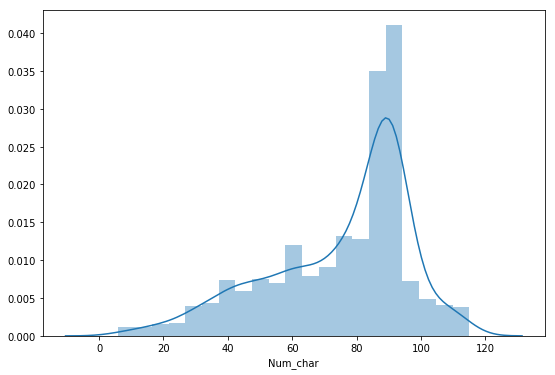

In [192]:
print(tweets.Num_char.describe())
plt.figure(figsize=(9, 6))
sns.distplot(tweets['Num_char'])

**if added a column containing the count of characters of eahc tweet exculding white spaces and url
we can see that the num of characters in tweets ranges from 6-115 character , where the average number of characters is around 75 character per tweet**

### multivariate analysis :

#### what are the relations between different variables :

##### * 1- relation between days of the week and retweets and favorite patterns (assuming more retweets at holidays)
##### * 2-Are  higher rated images are more retweeted or liked ?
##### * 3-Does tweets with emojis have more retweetes ?
##### * 4- longer characters retweets are more favorited or retweeted ?
##### * 5-  specific type of dog has higher numerator ? has more likes or retweets ?
##### * 6- specific dog label has higher numerator ? has higher favorite and retweets count ?
 

In [193]:
tweets[tweets['rating_numerator'].isnull()]

,tweet_id,timestamp,source_of_tweet,text,expanded_urls,rating_numerator,rating_denominator,name,is_emoji,dog_1_label,...,Is_it_dog_1,Second_prediction,confidence_percent_2,Is_it_dog_2,Third_prediction,confidence_percent_3,Is_it_dog_3,year_of_tweet,month_of_tweet,Num_char


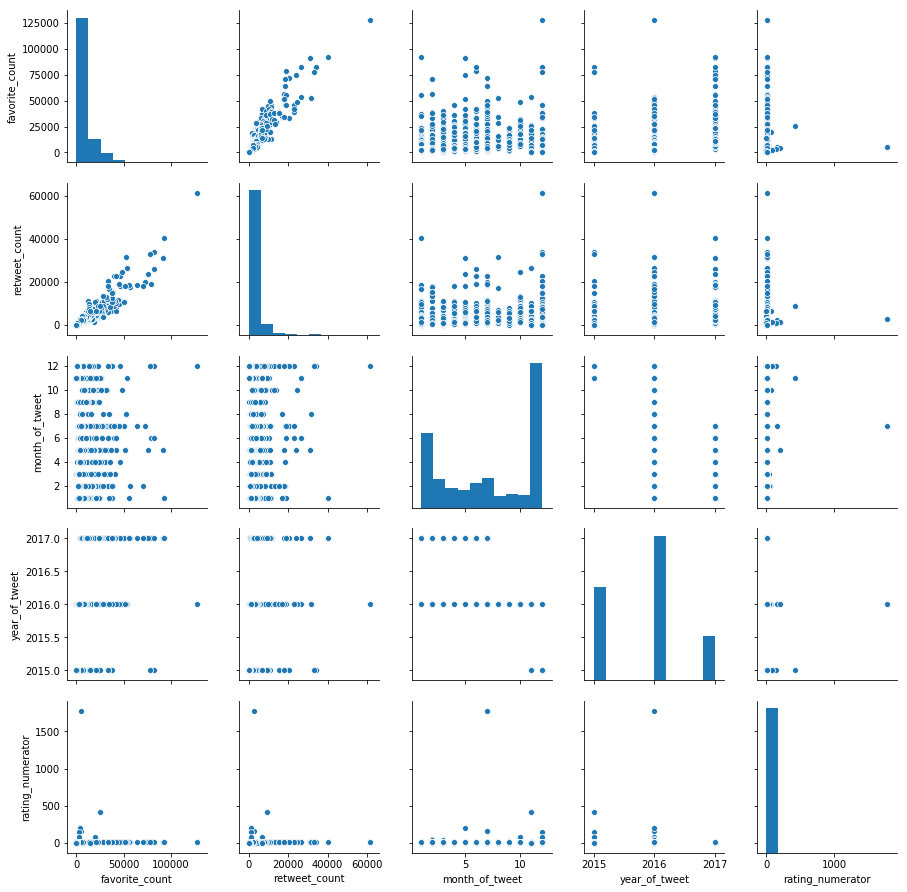

In [194]:
tweets[['rating_numerator','rating_denominator']]=tweets[['rating_numerator','rating_denominator']].fillna(-1)
tweets[['month_of_tweet','year_of_tweet']]=tweets[['month_of_tweet','year_of_tweet']].astype(int)


data=tweets[['favorite_count','retweet_count','month_of_tweet','year_of_tweet','rating_numerator']]
g=sns.pairplot(data )

In [195]:
data.corr()>0.3

,favorite_count,retweet_count,month_of_tweet,year_of_tweet,rating_numerator
favorite_count,True,True,False,True,False
retweet_count,True,True,False,True,False
month_of_tweet,False,False,True,False,False
year_of_tweet,True,True,False,True,False
rating_numerator,False,False,False,False,True


**From tha pairplot matrix we can see that favorite count and retweet counts have some correlation**

#### 1- relation between days of the week and retweets and favorite patterns (assuming more retweets at holidays)

In [197]:

tweets['day_of_week']=tweets.timestamp.apply(lambda x : calendar.day_name[x.weekday()]).astype('category')
tweets_no_outliers_quantile['day_of_week']=tweets_no_outliers_quantile.timestamp.apply(lambda x : calendar.day_name[x.weekday()]).astype('category')

E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


count     1367  
unique    7     
top       Monday
freq      224   
Name: day_of_week, dtype: object


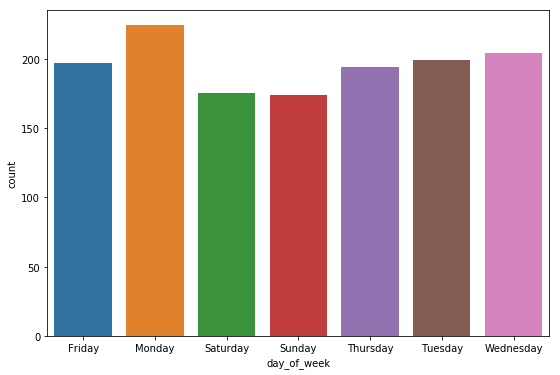

In [198]:
print(tweets.day_of_week.describe())
plt.figure(figsize=(9, 6))
sns.countplot(x='day_of_week',data=tweets )

(0, 10000)

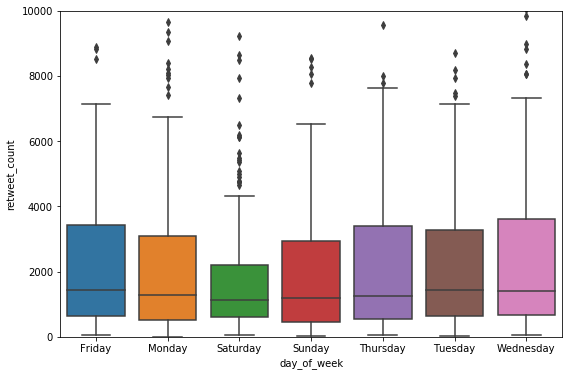

In [199]:
plt.figure(figsize=(9, 6))
ax=sns.boxplot(x='day_of_week',y='retweet_count',data=tweets_no_outliers_quantile )
ax.set_ylim(0, 10000)

**No significant increase in favorite or retweets rates on holidays , although some days have less retweets of the weratedogs account as saturday**

#### 2- Are higher rated images are more retweeted or liked ?

10.0      314
12.0      311
11.0      261
13.0      175
9.0       97 
8.0       67 
7.0       35 
6.0       22 
14.0      20 
5.0       19 
3.0       13 
4.0       13 
2.0       5  
1.0       4  
1776.0    1  
204.0     1  
45.0      1  
60.0      1  
44.0      1  
27.0      1  
144.0     1  
88.0      1  
165.0     1  
75.0      1  
420.0     1  
Name: rating_numerator, dtype: int64


E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


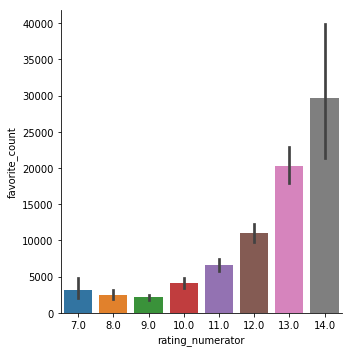

In [203]:
print(tweets.rating_numerator.value_counts())

#exsclude datapoints where denominator >15
sns.catplot(x='rating_numerator',y='favorite_count',kind='bar',data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15])


E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


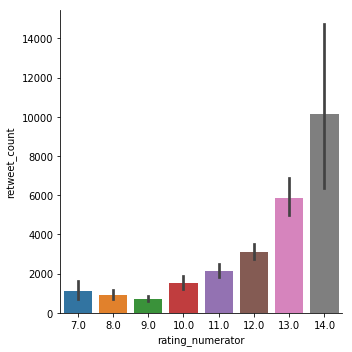

In [205]:
sns.catplot(x='rating_numerator',y='retweet_count',kind='bar',data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15])


(0, 70000)

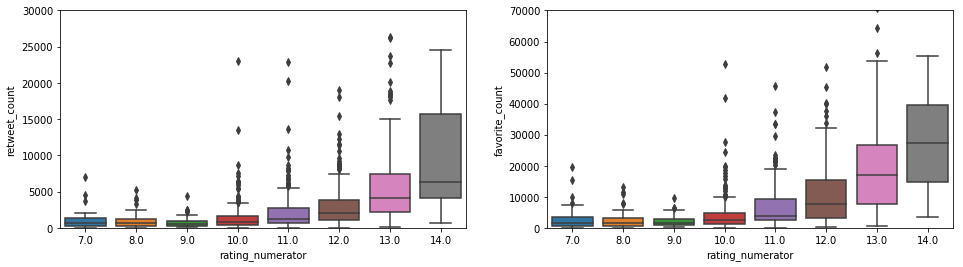

In [206]:
f,ax=plt.subplots(1,2,figsize=(16,4))
ax = ax.ravel()
ax1=sns.boxplot(x='rating_numerator',y='retweet_count',data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15],ax=ax[0])
ax2=sns.boxplot(x='rating_numerator',y='favorite_count',data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15],ax=ax[1])
ax1.set_ylim(0, 30000)
ax2.set_ylim(0, 70000)

**Seemingly higher rated images of dogs are more liked and retweeted for higher scores (8 up to 14 out of 10) , while this pattern is not evident in lower scores and for score of 1 a peak is found then are lower scores of animals not dogs ?**

E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 70000)

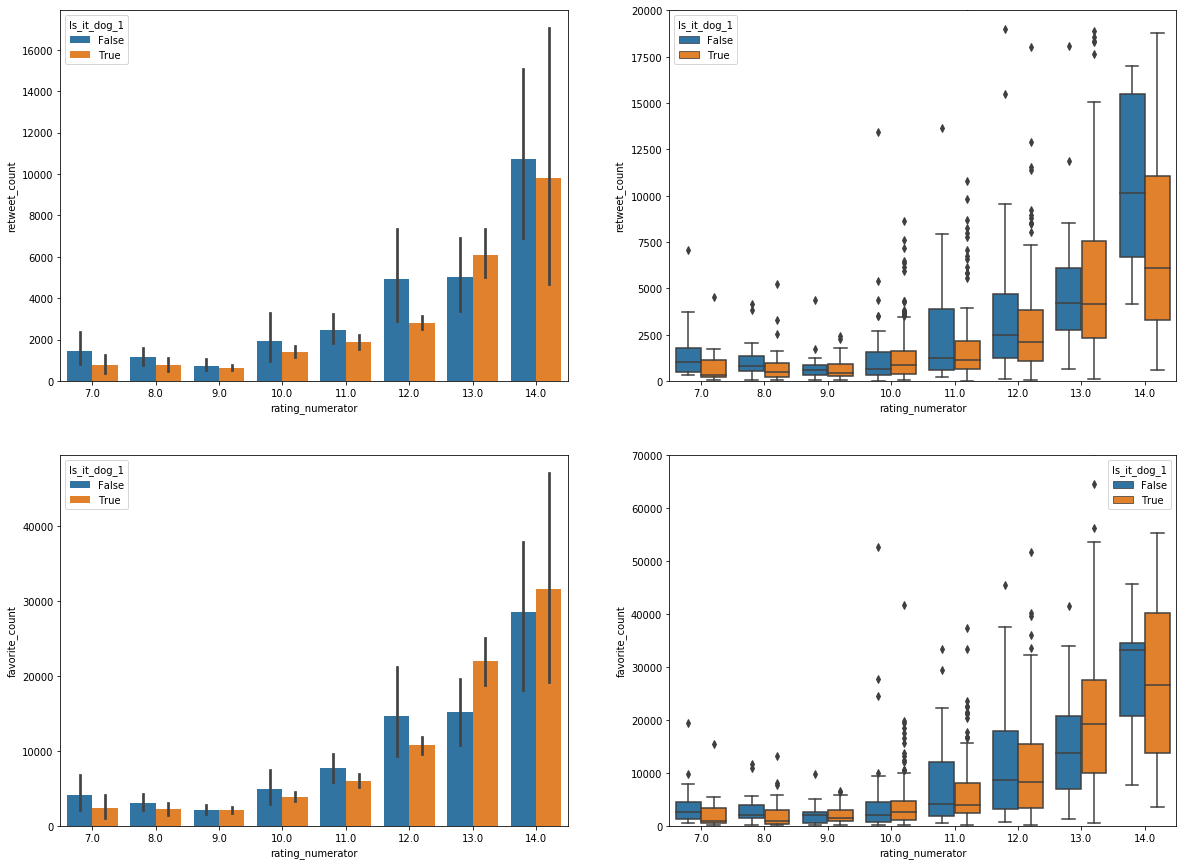

In [207]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax = ax.ravel()
ax1=sns.barplot(x='rating_numerator',y='retweet_count',hue='Is_it_dog_1' ,data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15],ax=ax[0])
ax2=sns.boxplot(x='rating_numerator',y='retweet_count',hue='Is_it_dog_1' ,data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15],ax=ax[1])
ax2.set_ylim(0, 20000)
ax3=sns.barplot(x='rating_numerator',y='favorite_count',hue='Is_it_dog_1' ,data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15],ax=ax[2])
ax4=sns.boxplot(x='rating_numerator',y='favorite_count',hue='Is_it_dog_1' ,data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['rating_numerator']<15],ax=ax[3])
ax4.set_ylim(0, 70000)

**whether the image have a dog on it or not doesn't seem significant of score given , but it seems for the same score the retweeted counts are higher for images for which the algorithm identified as there is no dogs on them**

**for favorite counts that pattern doesn't hold**

**-taking a sample of images that the algorithm chosen for having no dogs on them ,they are three types , an image where it is actually a dog but it is not clear from the background whether there is a dog or not even for humans and that is why they send it to weratedogs , misclassified images due to algorithm error and other animals-**


#### 3-Does tweets with emojis have more retweetes ?

count     1185 
unique    2    
top       False
freq      1177 
Name: is_emoji, dtype: object


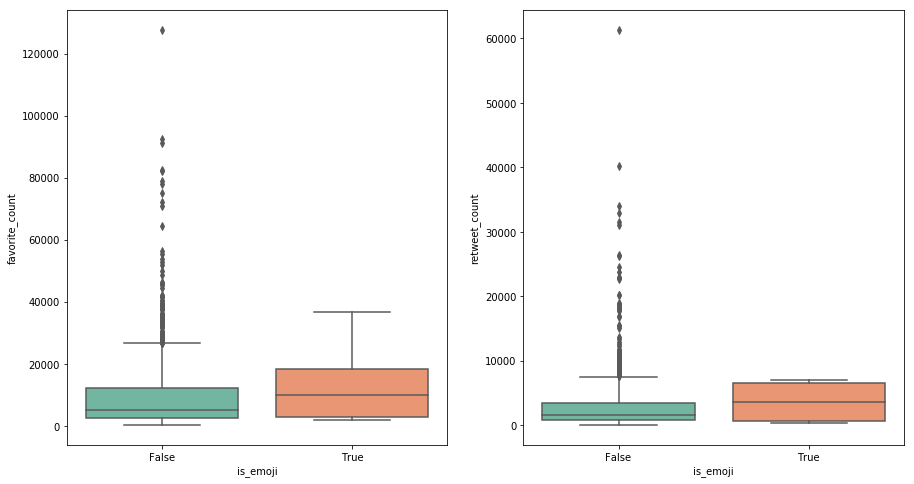

In [226]:
print(tweets['is_emoji'].describe())
f,ax=plt.subplots(1,2,figsize=(15,8))
ax = ax.ravel()
sns.boxplot(x='is_emoji',y='favorite_count',data=tweets_no_outliers_quantile, palette="Set2",ax=ax[0])
sns.boxplot(x='is_emoji',y='retweet_count',data=tweets_no_outliers_quantile, palette="Set2",ax=ax[1])


**Tweets with emojis seems to have to more favorite and retweet counts**

####  4- longer characters retweets are more favorited or retweeted ?

count    1367.000000
mean     75.159473  
std      21.907987  
min      6.000000   
25%      61.000000  
50%      83.000000  
75%      91.000000  
max      115.000000 
Name: Num_char, dtype: float64


E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


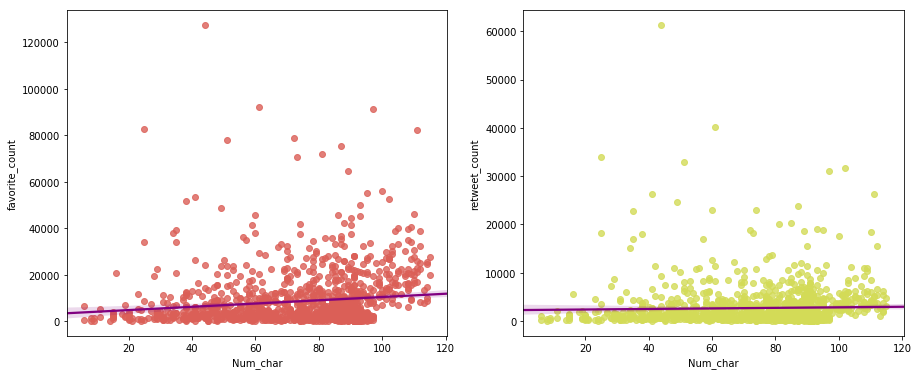

In [225]:
print(tweets.Num_char.describe())
f,ax=plt.subplots(1,2,figsize=(15,6))
ax = ax.ravel()
colors = sns.color_palette('hls')
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)
sns.regplot(x='Num_char',y='favorite_count',data=tweets_no_outliers_quantile,ax=ax[0],line_kws = {'color':'purple'})
sns.regplot(x='Num_char',y='retweet_count',data=tweets_no_outliers_quantile,ax=ax[1],line_kws = {'color':'purple'})

####  5- Are higher scores linked to a specific type of a dog? Do higher favorite and retweets count have a link too  ?

In [212]:
tweets_no_outliers_quantile.columns

Index(['tweet_id', 'timestamp', 'source_of_tweet', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'is_emoji',
       'dog_1_label', 'dog_2_label', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'First_prediction', 'confidence_percent_1',
       'Is_it_dog_1', 'Second_prediction', 'confidence_percent_2',
       'Is_it_dog_2', 'Third_prediction', 'confidence_percent_3',
       'Is_it_dog_3', 'year_of_tweet', 'month_of_tweet', 'Num_char',
       'day_of_week'],
      dtype='object')

In [214]:
top_15_dogs=tweets_no_outliers_quantile.First_prediction.value_counts(sort=True)[:15].index.astype('str')
data=tweets_no_outliers_quantile[tweets_no_outliers_quantile['First_prediction'].isin(top_15_dogs)]
data['First_prediction']=data['First_prediction'].astype(str).astype('category')

E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Chesapeake_Bay_retriever'),
 Text(0,0,'Chihuahua'),
 Text(0,0,'French_bulldog'),
 Text(0,0,'Labrador_retriever'),
 Text(0,0,'Pembroke'),
 Text(0,0,'Pomeranian'),
 Text(0,0,'Samoyed'),
 Text(0,0,'Shih-Tzu'),
 Text(0,0,'beagle'),
 Text(0,0,'chow'),
 Text(0,0,'cocker_spaniel'),
 Text(0,0,'golden_retriever'),
 Text(0,0,'malamute'),
 Text(0,0,'pug'),
 Text(0,0,'toy_poodle')]

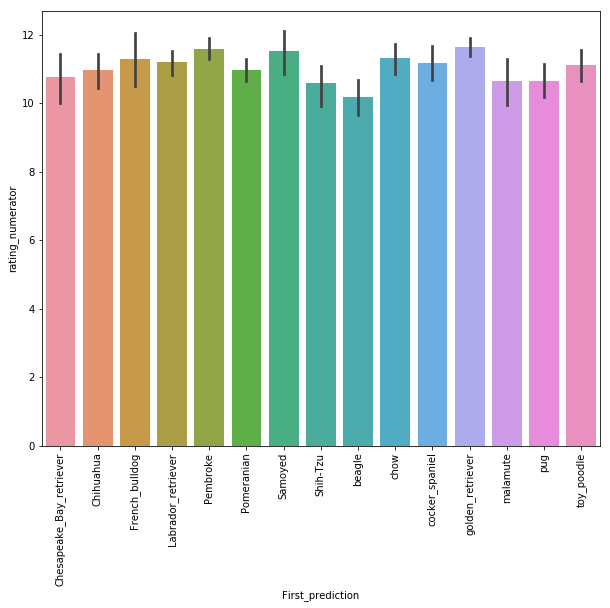

In [215]:
f,ax=plt.subplots(1,1,figsize=(10,8))

colors = sns.color_palette('hls')
ax.set_color_cycle(colors)


ax1=sns.barplot(y='rating_numerator',x='First_prediction',data=data)
loc, labels = plt.xticks()
ax1.set_xticklabels(labels, rotation=90)

E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
E:\Anaconda3\envs\data\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Chesapeake_Bay_retriever'),
 Text(0,0,'Chihuahua'),
 Text(0,0,'French_bulldog'),
 Text(0,0,'Labrador_retriever'),
 Text(0,0,'Pembroke'),
 Text(0,0,'Pomeranian'),
 Text(0,0,'Samoyed'),
 Text(0,0,'Shih-Tzu'),
 Text(0,0,'beagle'),
 Text(0,0,'chow'),
 Text(0,0,'cocker_spaniel'),
 Text(0,0,'golden_retriever'),
 Text(0,0,'malamute'),
 Text(0,0,'pug'),
 Text(0,0,'toy_poodle')]

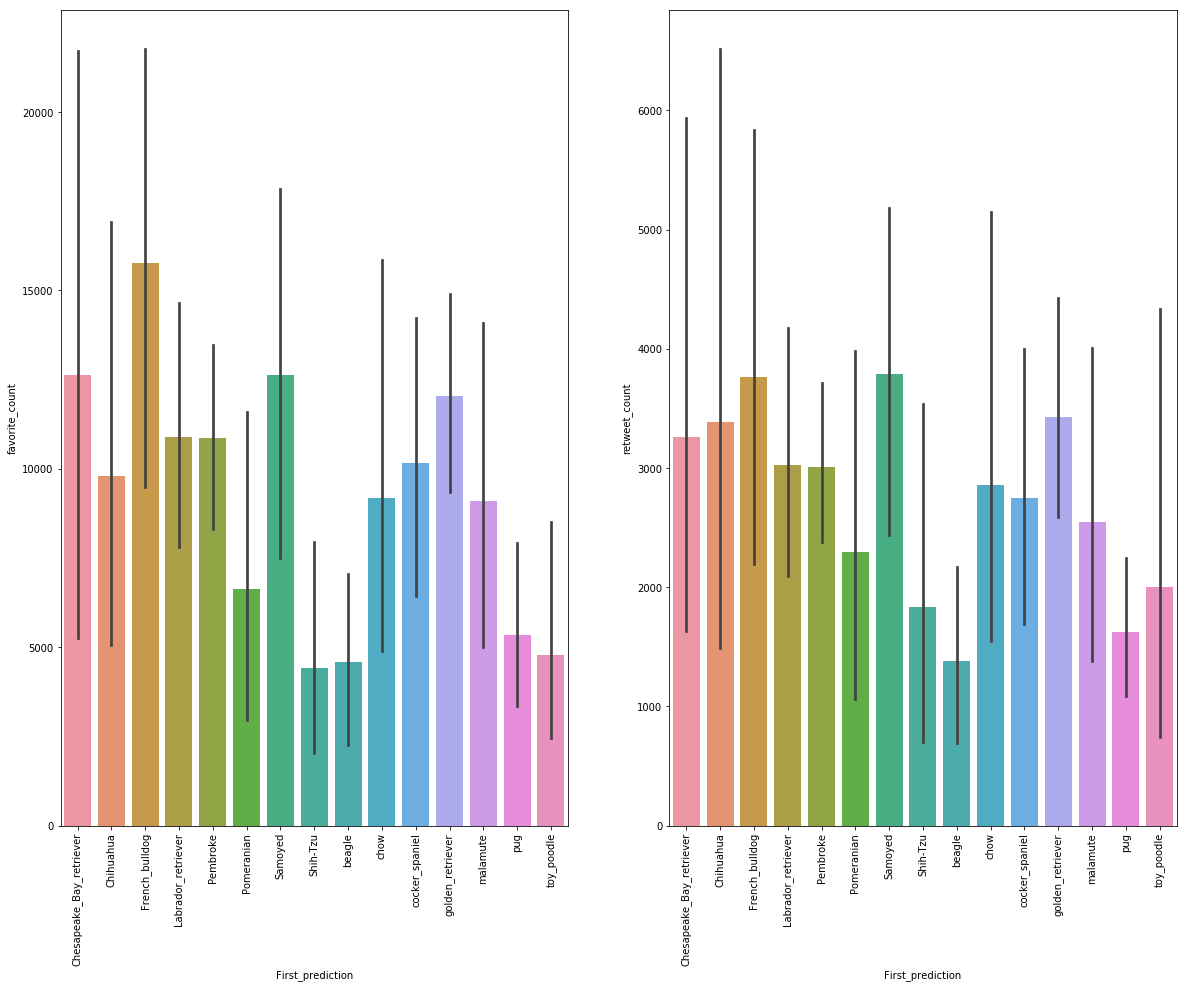

In [216]:
f,ax=plt.subplots(1,2,figsize=(20,15))
ax=ax.ravel()
colors = sns.color_palette('hls')
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)

ax1=sns.barplot(y='favorite_count',x='First_prediction',data=data,ax=ax[0])
ax2=sns.barplot(y='retweet_count',x='First_prediction',data=data,ax=ax[1])
loc, labels = plt.xticks()
ax1.set_xticklabels(labels, rotation=90)
ax2.set_xticklabels(labels, rotation=90)

**There is no specific type of dog that had a higher rating given by weratedogs account than others 
But there are 2 types that top the favorite and retweet counts the French_bulldog and the Samoyed**

####  6- specific dog label has higher numerator ? has higher favorite and retweets count ?

E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  app.launch_new_instance()


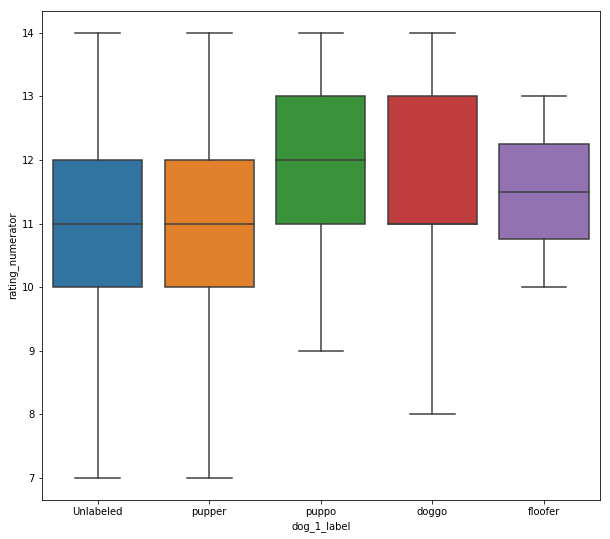

In [219]:
f,ax=plt.subplots(1,1,figsize=(10,9))
colors = sns.color_palette('hls')
ax.set_color_cycle(colors)
sns.boxplot(y='rating_numerator',x='dog_1_label',data=tweets_no_outliers_quantile)

E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
E:\Anaconda3\envs\data\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


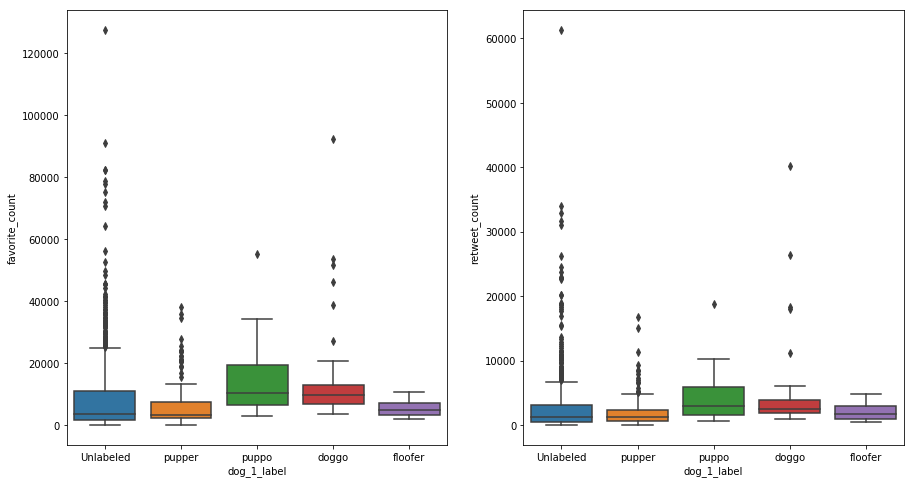

In [224]:
f,ax=plt.subplots(1,2,figsize=(15,8))
ax=ax.ravel()
colors = sns.color_palette('hls')
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)

ax1=sns.boxplot(y='favorite_count',x='dog_1_label',data=tweets_no_outliers_quantile,ax=ax[0])
ax2=sns.boxplot(y='retweet_count',x='dog_1_label',data=tweets_no_outliers_quantile,ax=ax[1])


**The pupppo and doggo dog-labels achieved higher scores , favorite and retweet count for puppo dog_label were the highest** 